# Production Technology

The dataset contains `N = 441` firms observed over `T = 12` years, 1968-1979. There variables are: 
* `lcap`: Log of capital stock, $k_{it}$ 
* `lemp`: log of employment, $\ell_{it}$ 
* `ldsa`: log of deflated sales, $y_{it}$
* `year`: the calendar year of the observation, `year` $ = 1968, ..., 1979$, 
* `firmid`: anonymized indicator variable for the firm, $i = 1, ..., N$, with $N=441$. 

In [123]:
import pandas as pd 
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import w3_LinearModels as lm

In [124]:
dat = pd.read_csv('firms.csv')

In [125]:
dat.sample(5)

,firmid,year,lcap,lemp,ldsa
90,8,1974,3.819775,3.291067,3.729517
5102,426,1970,0.701681,0.526462,0.171333
2646,221,1974,1.124310,0.498360,1.286152
2013,168,1977,-2.515980,-1.630330,-1.344540
3709,310,1969,-1.813420,-1.026040,-1.466360


In [126]:
dat.year.unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979])

# Descriptives

In [127]:
dat.describe()

,firmid,year,lcap,lemp,ldsa
count,5292.000000,5292.000000,5.292000e+03,5.292000e+03,5.292000e+03
mean,221.000000,1973.500000,-7.125472e-09,-1.252834e-08,4.695767e-09
std,127.317437,3.452379,1.310973e+00,1.180122e+00,1.232499e+00
min,1.000000,1968.000000,-3.864950e+00,-3.382780e+00,-3.551540e+00
25%,111.000000,1970.750000,-9.083267e-01,-7.855270e-01,-9.279720e-01
50%,221.000000,1973.500000,-1.180615e-01,-1.137295e-01,-1.029710e-01
75%,331.000000,1976.250000,9.063340e-01,7.930060e-01,8.562296e-01
max,441.000000,1979.000000,4.103687e+00,3.371332e+00,3.913391e+00


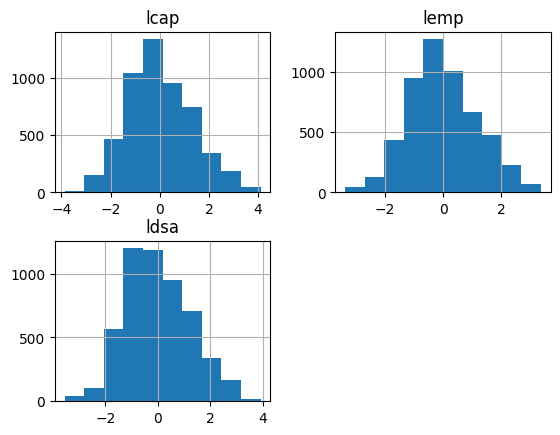

In [128]:
dat[['lcap','lemp','ldsa']].hist();

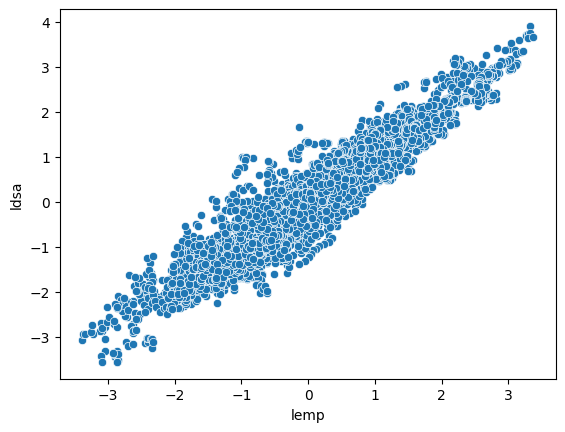

In [129]:
sns.scatterplot(x='lemp', y='ldsa', data=dat); 

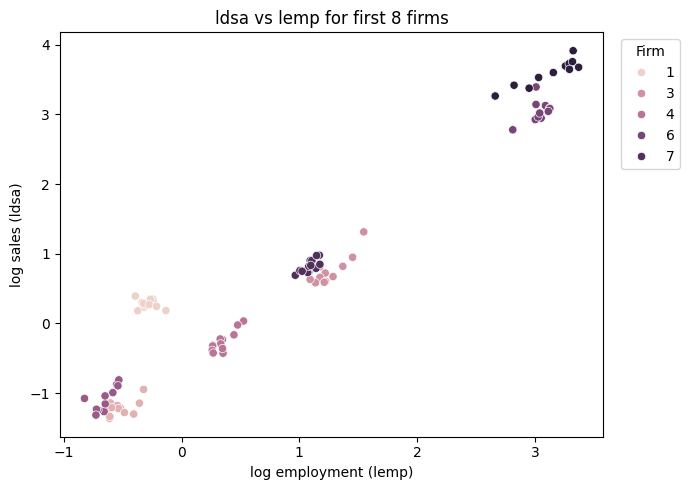

In [130]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# pick how many firms you want
k = 8  # e.g., first 6 firms; change to 5–8 as you like

firm_col = "firmid"          # change to "firm" if that's your column name
ids = dat[firm_col].unique()[:k]
sub = dat[dat[firm_col].isin(ids)]

plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x="lemp", y="ldsa", hue=firm_col)
plt.xlabel("log employment (lemp)")
plt.ylabel("log sales (ldsa)")
plt.title(f"ldsa vs lemp for first {k} firms")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


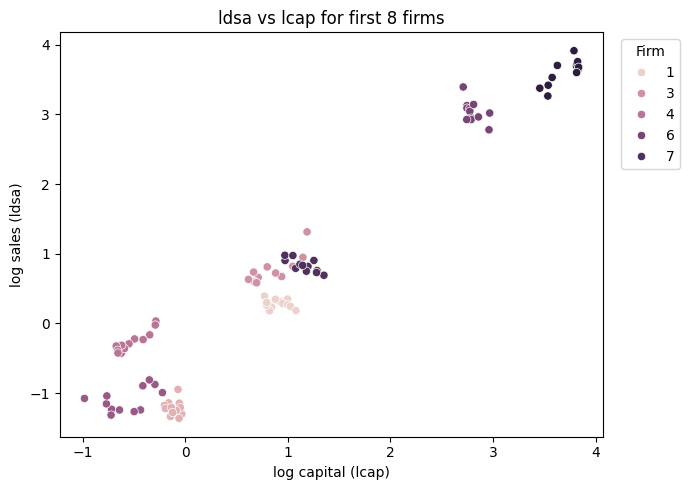

In [131]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# pick how many firms you want
k = 8  # e.g., first 6 firms; change to 5–8 as you like

firm_col = "firmid"          # change to "firm" if that's your column name
ids = dat[firm_col].unique()[:k]
sub = dat[dat[firm_col].isin(ids)]

plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x="lcap", y="ldsa", hue=firm_col)
plt.xlabel("log capital (lcap)")
plt.ylabel("log sales (ldsa)")
plt.title(f"ldsa vs lcap for first {k} firms")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Converting data to numpy format 

In [132]:
dat.ldsa.values.shape

(5292,)

In [133]:
N = dat.firmid.unique().size
T = dat.year.unique().size
assert dat.shape[0] == N*T, f'Error: data is not a balanced panel'
print(f'Data has N={N} and T={T}')

Data has N=441 and T=12


Extract data from `pandas` to `numpy` arrays. 

In [134]:
y = dat.ldsa.values.reshape((N*T,1))

ones = np.ones((N*T,1))
l = dat.lemp.values.reshape((N*T,1))
k = dat.lcap.values.reshape((N*T,1))
X = np.hstack([ones, l, k])
print(X)

[[ 1.        -0.242185   0.9986017]
 [ 1.        -0.241278   0.9252139]
 [ 1.        -0.265134   0.8796163]
 ...
 [ 1.        -0.672649  -0.719267 ]
 [ 1.        -0.623978  -0.536874 ]
 [ 1.        -0.567195  -0.522616 ]]


In [135]:
label_y = "Log sales (ldsa)"
label_x = ["cons", "Log capital (lcap)", "Log employment (lemp)"]

In [136]:
def remove_zero_columns(x, label_x):
    """
    The function removes columns from a matrix that are all zeros and returns the updated matrix and
    corresponding labels.
    
    Args:
      x: The parameter `x` is a numpy array representing a matrix with columns that may contain zeros.
      label_x: The parameter `label_x` is a list that contains the labels for each column in the input
    array `x`.
    
    Returns:
      x_nonzero: numpy array of x with columns that are all zeros removed.
      label_nonzero: list of labels for each column in x_nonzero.
    """
    
    # Find the columns that are not all zeros
    nonzero_cols = ~np.all(x == 0, axis=0)
    
    # Remove the columns that are all zeros
    x_nonzero = x[:, nonzero_cols]
    
    # Get the labels for the columns that are not all zeros
    label_nonzero = [label_x[i] for i in range(len(label_x)) if nonzero_cols[i]]
    return x_nonzero, label_nonzero

In [137]:
pols_result = lm.estimate(y, X, T=T) # Fill in

# Then, print the resulting dictionary using the provided print_table() function. The labels should have been provided to you.
lm.print_table((label_y, label_x), pols_result, title="Pooled OLS", floatfmt='.4f') # Fill in

Pooled OLS
Dependent variable: Log sales (ldsa)

                         Beta      Se    t-values
---------------------  ------  ------  ----------
cons                   0.0000  0.0161      0.0000
Log capital (lcap)     0.6748  0.0366     18.4526
Log employment (lemp)  0.3100  0.0324      9.5810
R² = 0.914
σ² = 0.131


In [138]:
# Transform the data
Q_T = np.eye(T) - 1/T * np.ones((T, T)) # Fill in
y_dot = lm.perm(Q_T, y) # Fill in
x_dot = lm.perm(Q_T, X) # Fill in

# Remove the columns that are only zeroes
x_dot, label_x_dot = remove_zero_columns(x_dot, label_x)

# Estimate 
fe_result = lm.estimate(y_dot, x_dot, transform='fe', T=T) # Fill in
lm.print_table((label_y, label_x_dot), fe_result, title="Fixed Effects", floatfmt='.4f')

Fixed Effects
Dependent variable: Log sales (ldsa)

                                 Beta                   Se    t-values
---------------------  --------------  -------------------  ----------
cons                   196266997.0270  33608578711031.5742      0.0000
Log capital (lcap)             0.6942               0.0417     16.6674
Log employment (lemp)          0.1546               0.0299      5.1630
R² = 0.477
σ² = 0.018


In [139]:
# Transform the data
D_T = - np.eye(T-1, T) + np.eye(T-1, T, k=1) # Fill in
y_diff = lm.perm(D_T, y) # Fill in
x_diff = lm.perm(D_T, X) # Fill in

# Remove the columns that are only zeroes
x_diff, label_x_diff = remove_zero_columns(x_diff, label_x)

# Estimate 
fd_result = lm.estimate(y_diff, x_diff, transform='fd', T=T-1) # Fill in
lm.print_table((label_y, label_x_diff), fd_result, title="First Difference", floatfmt='.4f')

First Difference
Dependent variable: Log sales (ldsa)

                         Beta      Se    t-values
---------------------  ------  ------  ----------
Log capital (lcap)     0.5487  0.0292     18.8191
Log employment (lemp)  0.0630  0.0232      2.7097
R² = 0.165
σ² = 0.014


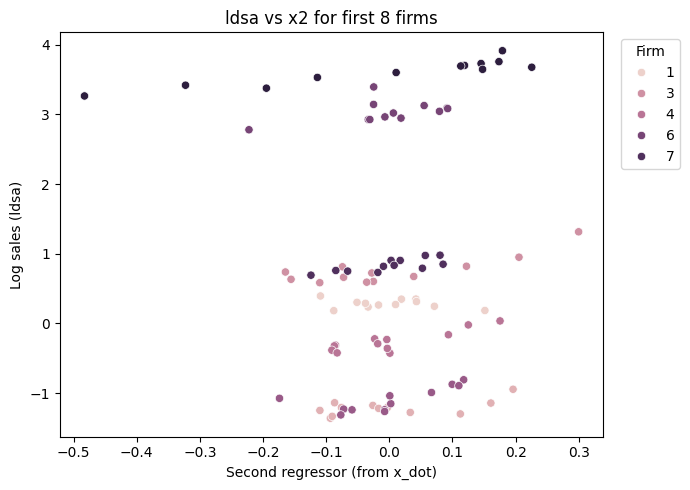

In [122]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Turn x_dot and y into a dataframe
plot_df = pd.DataFrame({
    "ldsa": y.flatten(),        # dependent variable
    "x2": x_dot[:, 1],          # second column of x_dot
    "firmid": dat["firmid"],    # firm identifier
    "year": dat["year"]         # optional: year
})

# Pick first k firms
k = 8
ids = plot_df["firmid"].drop_duplicates().head(k)
sub = plot_df[plot_df["firmid"].isin(ids)]

# Scatterplot
plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x="x2", y="ldsa", hue="firmid")
plt.xlabel("Log capital (lcap)")
plt.ylabel("Log sales (ldsa)")
plt.title(f"ldsa vs x2 for first {k} firms")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [140]:
df = pd.read_csv("firms.csv")
overall_var = df["lcap"].var()
between_var = df.groupby("firmid")["lcap"].mean().var()
within_var = df.groupby("firmid")["lcap"].var().mean()

print("Overall variance:", overall_var)
print("Between-firm variance:", between_var)
print("Within-firm variance:", within_var)

Overall variance: 1.7186496017073687
Between-firm variance: 1.6932758804775765
Within-firm variance: 0.031514820390039645
